# Dataset
brief explanation of each feature:

* CustomerID: A unique identifier for each customer.
* Name: The name of the customer (text).
* Age: The age of the customer (integer).
* Gender: The gender of the customer (text, e.g. Male or Female).
* Location: The location or city where the customer is located (5 location  ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']).
* Subscription_Length_Months: The duration of the customer's subscription in months (integer).
* Monthly_Bill: The amount billed to the customer each month (numeric).
* Total_Usage_GB: The total data usage in gigabytes by the customer (numeric).
* Churn: A binary indicator of whether the customer has churned (0 for No, 1 for Yes).

<hr>

## Correlations

Summary of correlations between churn and other variables:

* Churn vs. Age: Positive but very weak correlation (0.001559)
* Churn vs. Subscription_Length_Months: Positive but very weak correlation (0.002328)
* Churn vs. Monthly_Bill: Close to zero correlation (-0.000211)
* Churn vs. Total_Usage_GB: Negative but very weak correlation (-0.002842)
 
Conclusion: There are no strong linear relationships between churn and the other variables in the dataset. Therefore, none of these features strongly determine or predict churn.

I.e Churn is not strongly correlated with any of the other variables, so it cannot be predicted with certainty based on those variables alone.

<hr>

# Feature Engineering 

* Total_Spend : Total amount spent by each customer during their subscription.
* Data_Value : Indicates how efficiently a customer uses data in relation to their bill.
* Age_Group : Categorizes customers into age brackets: 'Young,' 'Middle-aged,' or 'Senior.'
* Loyal_Customer : Identifies if a customer is loyal (1) or not (0) based on a long subscription.
* Monthly_Usage_per_Age : Average data usage for each age group.
* Usage_Difference : Difference between a customer's data usage and their age group's average usage, highlighting outliers or unique patterns.

<hr>


## Model Optimization:
* evaluate the performance of four different machine learning models on a classification task. The four models are:

    * Logistic Regression
    * Decision Tree
    * K-Nearest Neighbors
    * Random Forest

* Evaluate the performance of custom classifiers using 5-fold cross-validation.
* Tune the best-performing KNN model using GridSearchCV for hyperparameter tuning and save the optimized model.


### Result: 
* Precision (P): 50% of predicted "Fraud" cases were correct.
* Recall (R): 50% of actual "Fraud" cases were detected.
* F1-Score (F1): A balanced measure combining P and R.
* Accuracy: Correctly predicted 50% of cases.
* Class Distribution: About 50% "Not Fraud" and 50% "Fraud.

Not good Prediction

<hr>

## Improvement to be done :
* The dataset lacks in data/ feature that are corelated to the churn . 
* New feature needed
* Feature Engineering 


In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
import joblib

In [2]:
df = pd.read_excel('/home/ishant/Desktop/DedectChurn/Dataset/customer_churn_large_dataset.xlsx')

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [5]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [6]:
df.isna().sum()
# no null value 

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
# EDA 

Text(0.5, 1.0, 'Correlation Matrix')

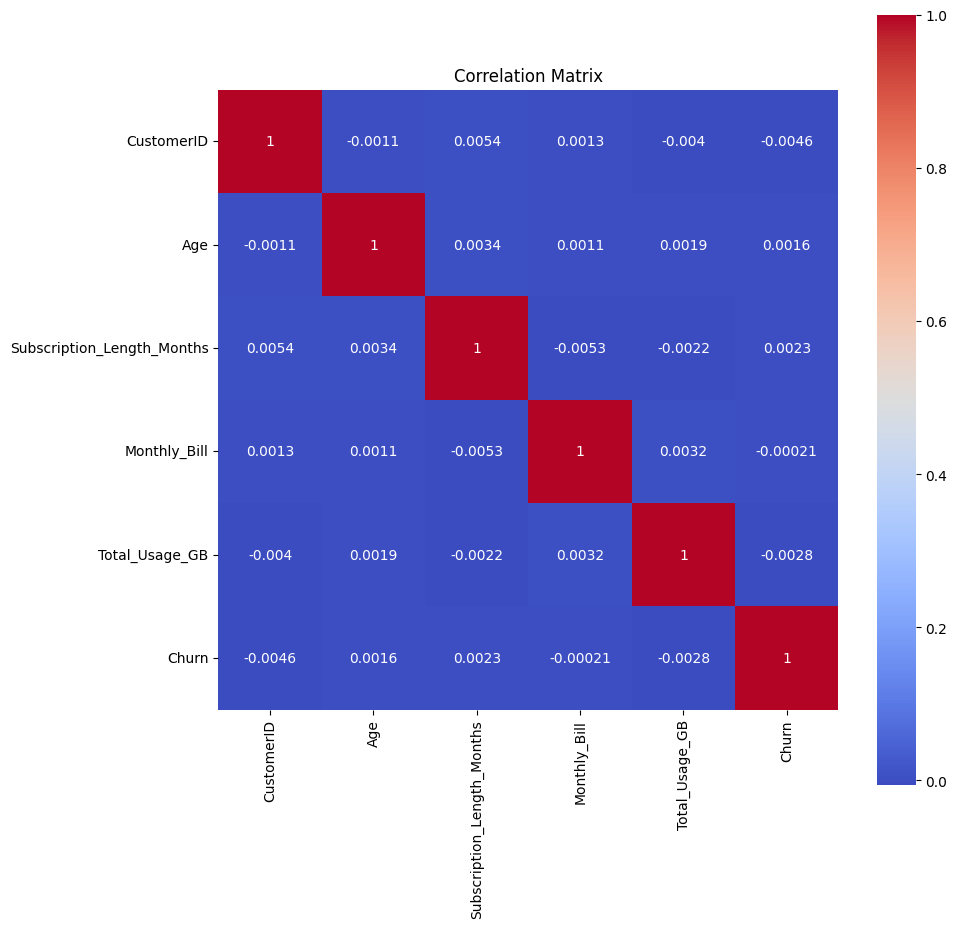

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

In [9]:
fig = go.Figure(data=[go.Pie(labels=['Not Churn','Churn'], values=df['Churn'].value_counts())])
fig.show()

In [10]:
fig = go.Figure(data=[go.Pie(labels=df['Location'].value_counts().index , values=df['Location'].value_counts())])
fig.show()

### outlier check

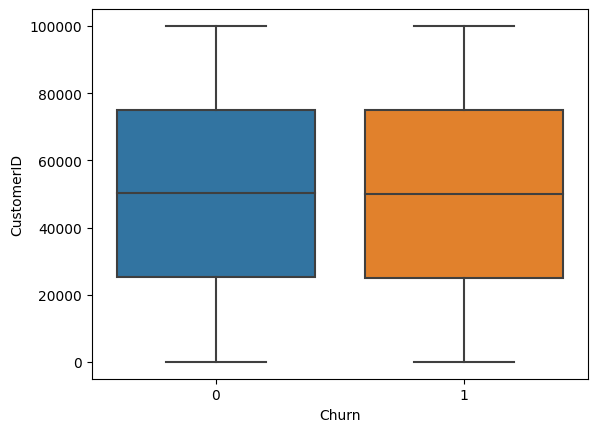

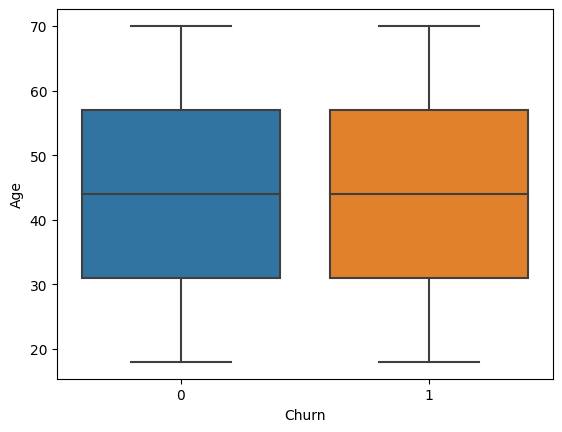

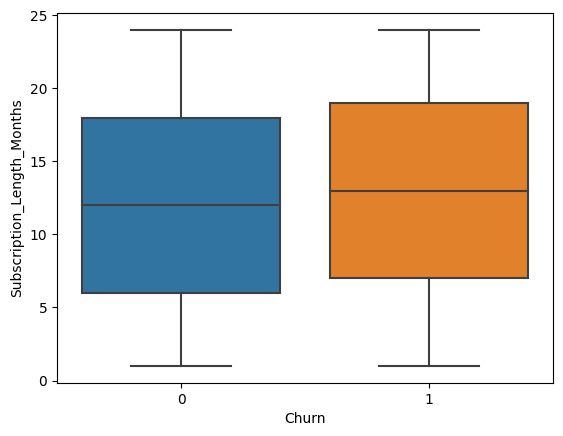

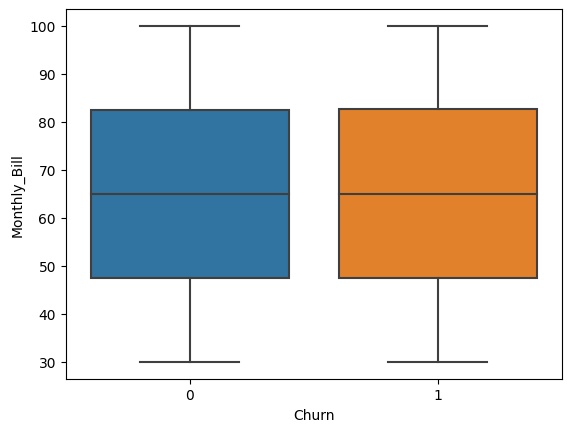

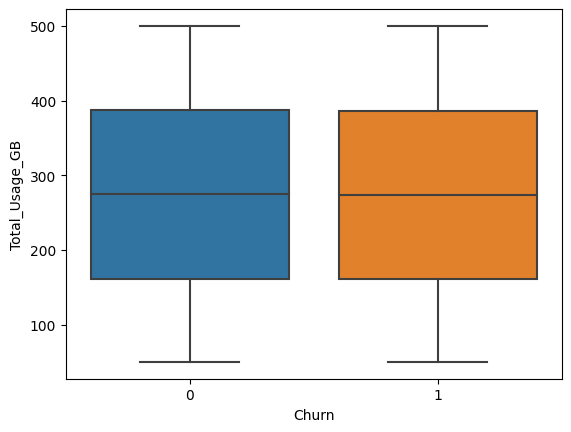

In [11]:
for i in numeric_cols:
    if i !='Churn':
        sns.boxplot(x = df.Churn, y = df[i])
        plt.show()

### Distribution Check

Text(0.5, 1.0, 'Distribution of Age by churn')

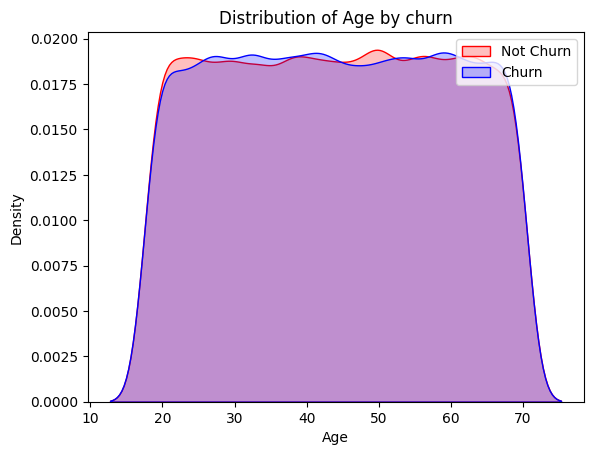

In [12]:
ax = sns.kdeplot(df.Age[(df["Churn"] == 0) ],
                color="Red", fill=True)
ax = sns.kdeplot(df.Age[(df["Churn"] == 1) ],
                ax =ax, color="Blue",fill=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by churn')

Text(0.5, 1.0, 'Distribution of Monthly_Bill by churn')

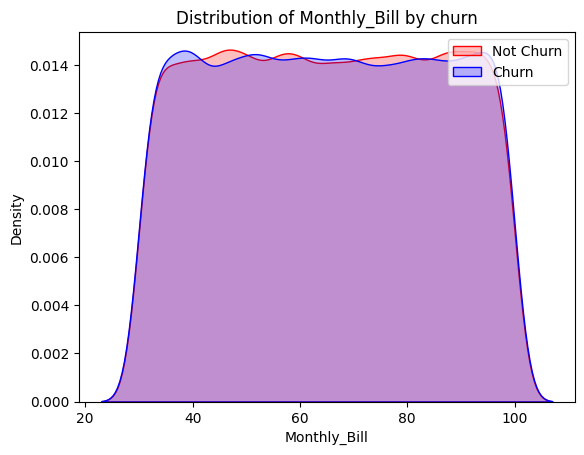

In [13]:
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0) ],
                color="Red", fill=True)
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1) ],
                ax =ax, color="Blue",fill=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly_Bill')
ax.set_title('Distribution of Monthly_Bill by churn')

Text(0.5, 1.0, 'Distribution of Total_Usage_GB by churn')

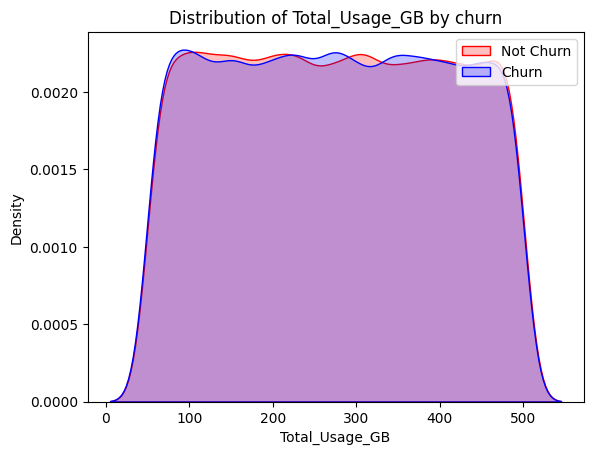

In [14]:
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 0) ],
                color="Red", fill=True)
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 1) ],
                ax =ax, color="Blue",fill=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total_Usage_GB')
ax.set_title('Distribution of Total_Usage_GB by churn')

# Feature Engineering 

In [15]:
df["Total_Spend"] = df.Subscription_Length_Months*df.Monthly_Bill
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66


In [16]:
Total_Spend_mean = df.groupby(['Churn'])['Total_Spend'].mean()
print(Total_Spend_mean)

Churn
0    811.074835
1    812.489733
Name: Total_Spend, dtype: float64


In [17]:
df['Data_Value'] = round(df.Total_Usage_GB/df.Monthly_Bill)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12,3.0
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76,4.0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35,5.0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82,3.0
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66,5.0


In [18]:
Data_val_mean = df.groupby(['Churn'])['Data_Value'].mean()
print(Data_val_mean)

Churn
0    4.718444
1    4.715824
Name: Data_Value, dtype: float64


In [19]:
df['Gender'].replace({"Male":1 , "Female":0} , inplace=True)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value
0,1,Customer_1,63,1,Los Angeles,17,73.36,236,0,1247.12,3.0
1,2,Customer_2,62,0,New York,1,48.76,172,0,48.76,4.0
2,3,Customer_3,24,0,Los Angeles,5,85.47,460,0,427.35,5.0
3,4,Customer_4,36,0,Miami,3,97.94,297,1,293.82,3.0
4,5,Customer_5,46,0,Miami,19,58.14,266,0,1104.66,5.0


In [20]:
Gender_count = df.groupby(['Churn'])['Gender'].value_counts()
print(Gender_count)

Churn  Gender
0      0         25272
       1         24949
1      0         24944
       1         24835
Name: count, dtype: int64


In [21]:
bins = [17, 35, 55, 71]  # Define age group bins
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.drop("Age", axis=1 , inplace=True)
df.head()

,CustomerID,Name,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group
0,1,Customer_1,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior
1,2,Customer_2,0,New York,1,48.76,172,0,48.76,4.0,Senior
2,3,Customer_3,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young
3,4,Customer_4,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged
4,5,Customer_5,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged


In [22]:
Age_count = df.groupby(['Churn'])['Age_Group'].value_counts()
print(Age_count)

Churn  Age_Group  
0      Middle-aged    19003
       Young          17000
       Senior         14218
1      Middle-aged    18838
       Young          16822
       Senior         14119
Name: count, dtype: int64


In [23]:
df['Loyal_Customer'] = df['Subscription_Length_Months'].apply(lambda x: 1 if x > 20 else 0)
df.head()

,CustomerID,Name,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Loyal_Customer
0,1,Customer_1,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,0
1,2,Customer_2,0,New York,1,48.76,172,0,48.76,4.0,Senior,0
2,3,Customer_3,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,0
3,4,Customer_4,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,0
4,5,Customer_5,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,0


In [24]:
Loyal_count = df.groupby(['Churn'])['Loyal_Customer'].value_counts()
print(Loyal_count)

Churn  Loyal_Customer
0      0                 41912
       1                  8309
1      0                 41471
       1                  8308
Name: count, dtype: int64


In [25]:
age_usage = df.groupby('Age_Group')['Total_Usage_GB'].mean().reset_index()
age_usage.rename(columns={'Total_Usage_GB': 'Monthly_Usage_per_Age'}, inplace=True)
df = df.merge(age_usage, on='Age_Group', how='left')

# Calculate the difference between a person's usage and their age group's mean usage
df['Usage_Difference'] = df['Total_Usage_GB'] - df['Monthly_Usage_per_Age']
df.drop('Monthly_Usage_per_Age' , axis=1 , inplace=True)
df.head()

,CustomerID,Name,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Loyal_Customer,Usage_Difference
0,1,Customer_1,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,0,-38.481208
1,2,Customer_2,0,New York,1,48.76,172,0,48.76,4.0,Senior,0,-102.481208
2,3,Customer_3,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,0,185.710603
3,4,Customer_4,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,0,22.578737
4,5,Customer_5,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,0,-8.421263


Text(0.5, 1.0, 'Correlation Matrix')

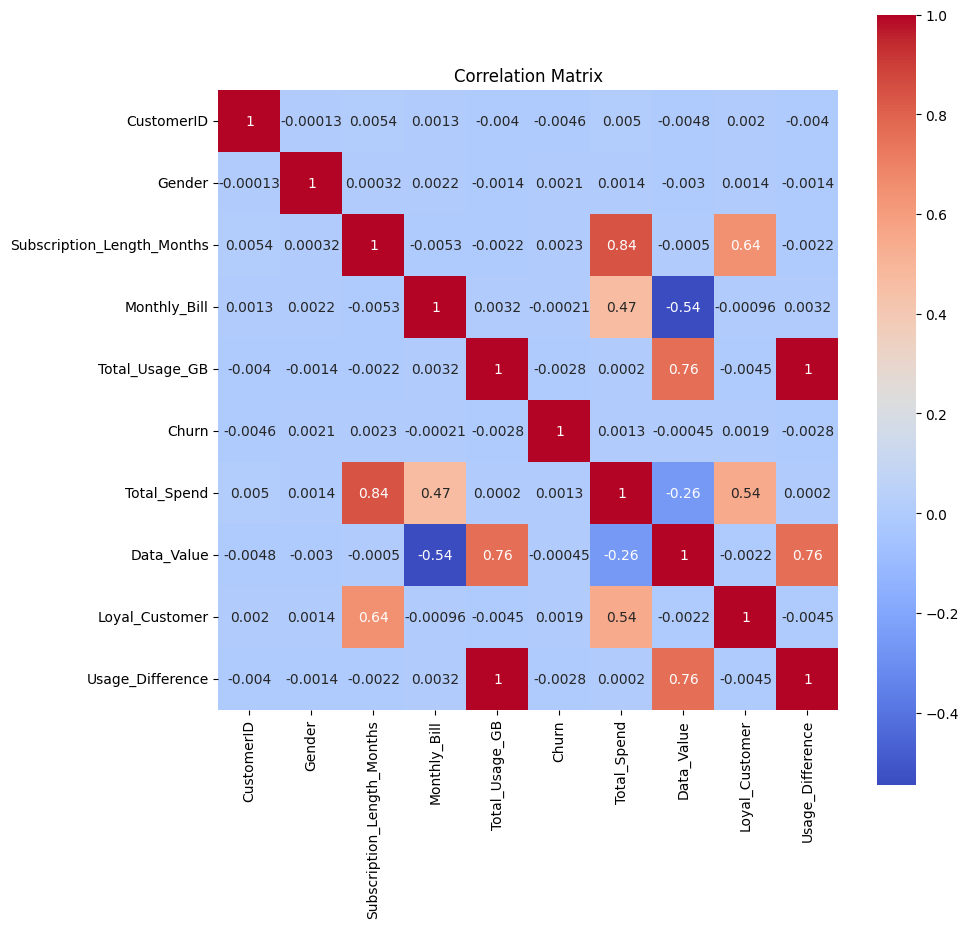

In [26]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

# Model Building
## Prepare Data

### 1. One hot encoding
One of the most important feature we have is type which is categorical in type. Since it doesnt have any ordinal nature and since the classes are less, we prefer applying one hot encoding. 

### 2. Standardize
Scale numerical features to have a mean of 0 and a standard deviation of 1.

### 3. Tokenization
 Break down text data into individual units (tokens) for analysis, often used in NLP.
 
### 4. Train-test split
Divide data into training and testing sets for model training and evaluation.


In [27]:
def prepare_data(data):
    # One-hot encode the 'type' column
    data = pd.concat([data, pd.get_dummies(data[['Location' , 'Age_Group']]).astype(int)], axis=1)

    data.drop(['Location' , 'Age_Group'], axis=1, inplace=True)
    

    X = data.drop('Churn', axis=1)
    y = data['Churn']
   

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=24)

    # Standardize selected columns
    col_names = X.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    X_train[col_names] = scaler.fit_transform(X_train[col_names])
    X_test[col_names] = scaler.transform(X_test[col_names])
    

    return X_train, X_test, y_train, y_test

In [28]:
df.head()

,CustomerID,Name,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Loyal_Customer,Usage_Difference
0,1,Customer_1,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,0,-38.481208
1,2,Customer_2,0,New York,1,48.76,172,0,48.76,4.0,Senior,0,-102.481208
2,3,Customer_3,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,0,185.710603
3,4,Customer_4,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,0,22.578737
4,5,Customer_5,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,0,-8.421263


In [29]:
df2 = df.drop(['CustomerID',	'Name' ] , axis=1)
df2.head()

,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Loyal_Customer,Usage_Difference
0,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,0,-38.481208
1,0,New York,1,48.76,172,0,48.76,4.0,Senior,0,-102.481208
2,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,0,185.710603
3,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,0,22.578737
4,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,0,-8.421263


In [30]:
X_train, X_test, y_train, y_test = prepare_data(df2)

## Model Training :


In [31]:
custom_names = {
    LogisticRegression(solver='liblinear', random_state=24): 'Custom Logistic Regression',
    DecisionTreeClassifier(random_state=24): 'Custom Decision Tree',
    KNeighborsClassifier(n_neighbors=5): 'Custom KNN',
    RandomForestClassifier(random_state=24): 'Custom Random Forest'
}


cv_models = list(custom_names.keys())

# Iterate through the models and print their test accuracy
for model in cv_models:
    model_name = custom_names[model]
    print("{} Test Accuracy: {}".format(model_name, cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()))

Custom Logistic Regression Test Accuracy: 0.5031285714285715
Custom Decision Tree Test Accuracy: 0.5016714285714285
Custom KNN Test Accuracy: 0.5031285714285715
Custom Random Forest Test Accuracy: 0.5025999999999999


In [32]:
# Create the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred= knn_classifier.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.50      0.51      0.51     15081
       Fraud       0.50      0.50      0.50     14919

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



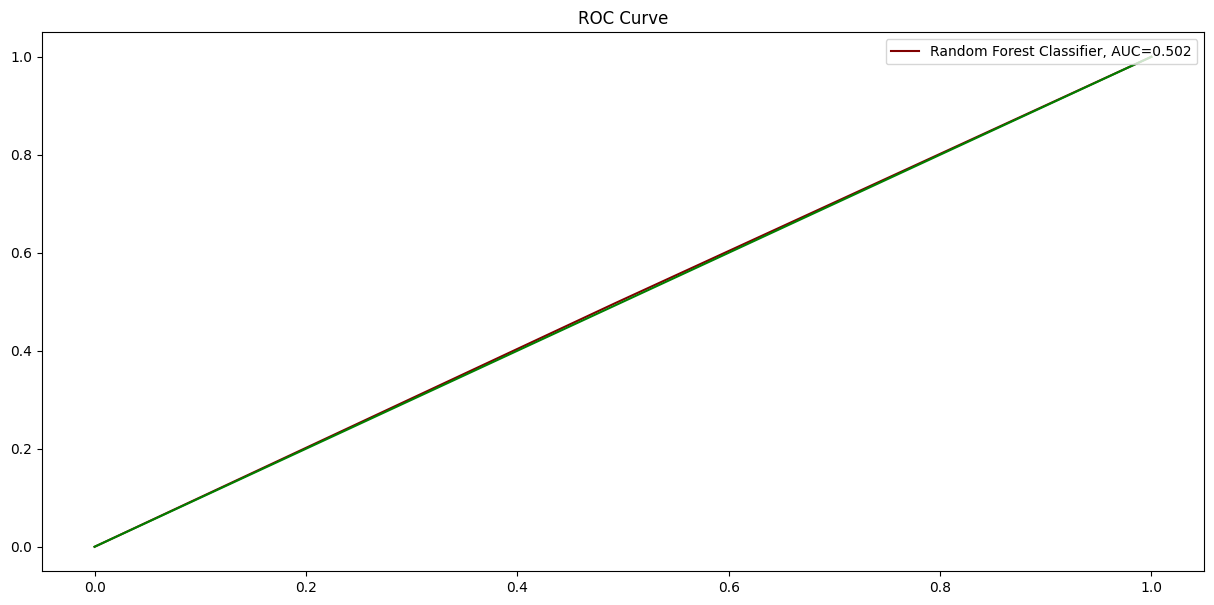

In [35]:
fpr, tpr, temp = roc_curve(y_test,y_pred)
auc = round(roc_auc_score(y_test,y_pred),3)
plt.figure(figsize=(15,7))
plt.plot(fpr,tpr,label='Random Forest Classifier, AUC='+str(auc),linestyle='solid',color='#800000')
plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC Curve')
plt.legend(loc='upper right')

## Hyper parameter Tuning

In [36]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust these values as needed
    'metric': ['euclidean', 'manhattan']  # Optional: Different distance metrics to consider
}

In [37]:
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='accuracy')

In [38]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Save the best model to a file using joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [39]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.50      0.51      0.51     15081
       Fraud       0.50      0.50      0.50     14919

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

